In [1]:
import numpy as np
import pandas as pd

tracks_genres = pd.read_csv('tracks_genres_mio.csv', index_col = 0, header = [0])

In [2]:
import librosa
import sklearn
import librosa.display
from scipy import stats
import os.path

audio_dir = 'C:/Users/bonno/ProgettoBigData/fma_large'
dizionario = {}

#Imposto parametri per il calcolo
sr = 22050
n_bands = 6

#Voglio estrarre feature da ogni traccia
for track_id in tracks_genres.index:
    try:
        #Nome del file audio da caricare
        tid_str = '{:06d}'.format(track_id)
        filename = os.path.join(audio_dir, tid_str[:3], tid_str + '.mp3')

        x , sr = librosa.load(filename, sr=sr)

        #spec_contrast = librosa.feature.spectral_contrast(x, sr=sr, hop_length=hop_length, n_fft=n_fft, n_bands = 6, quantile=0.02)
        spec_contrasts = librosa.feature.spectral_contrast(x, sr=sr, n_bands = n_bands)
        
        #Faccio le elaborazioni per ognuna delle n_bands bande di frequenza
        media_array, deviaz_array, max_array, min_array, mediana_array, skew_array, kurtosis_array = [], [], [], [], [], [], []
        for frequency_band in spec_contrasts[:-1]:
            media_array.append(np.mean(frequency_band))
            deviaz_array.append(np.std(frequency_band))
            max_array.append(np.amax(frequency_band))
            min_array.append(np.amin(frequency_band))
            mediana_array.append(np.median(frequency_band))
            skew_array.append(stats.skew(frequency_band))
            kurtosis_array.append(stats.kurtosis(frequency_band))
        
        concatened_array = np.concatenate((media_array, deviaz_array, max_array, min_array, mediana_array, skew_array, kurtosis_array))

        dizionario[track_id] = concatened_array
    except:
        print('Oh no! Traccia numero' , track_id, ' non funziona')

c:\users\bonno\anaconda3\envs\projectenv\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
c:\users\bonno\anaconda3\envs\projectenv\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Oh no! Traccia numero 1486  non funziona
Oh no! Traccia numero 5574  non funziona
Oh no! Traccia numero 12838  non funziona
Oh no! Traccia numero 29345  non funziona
Oh no! Traccia numero 29346  non funziona
Oh no! Traccia numero 29352  non funziona
Oh no! Traccia numero 29356  non funziona
Oh no! Traccia numero 33411  non funziona
Oh no! Traccia numero 33413  non funziona
Oh no! Traccia numero 33414  non funziona
Oh no! Traccia numero 33417  non funziona
Oh no! Traccia numero 33418  non funziona
Oh no! Traccia numero 33419  non funziona
Oh no! Traccia numero 33425  non funziona
Oh no! Traccia numero 50594  non funziona
Oh no! Traccia numero 53668  non funziona
Oh no! Traccia numero 54569  non funziona
Oh no! Traccia numero 54582  non funziona
Oh no! Traccia numero 65753  non funziona
Oh no! Traccia numero 80391  non funziona
Oh no! Traccia numero 94234  non funziona
Oh no! Traccia numero 98558  non funziona
Oh no! Traccia numero 98559  non funziona
Oh no! Traccia numero 98560  non fun

In [3]:
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler

#Dichiaro i nomi delle colonne del DataFrame che voglio creare dal dizionario
root_indexes = np.array(['contrast']*7*(n_bands+1))
lower_indexes = np.arange(1,n_bands+1)
lower_indexes = np.tile(lower_indexes, 7)
upper_indexes = np.array([['mean'],['std'],['max'],['min'],['median'],['skew'],['kurtosis']])
upper_indexes = np.repeat(upper_indexes, n_bands)

indexes_array = [root_indexes,upper_indexes,lower_indexes]
tuples = list(zip(*indexes_array))
index = pd.MultiIndex.from_tuples(tuples)

#Creo un DataFrame dal dizionario
contrasts_df = pd.DataFrame(data=dizionario.values(), index = dizionario.keys(), columns=index)
contrasts_df.index.name = 'track_id'

#Creo un altro DataFrame che ha i dati scalati con lo StandardScaler
scaler = StandardScaler()
scaled_contrasts = scaler.fit_transform(contrasts_df)

scaled_contrasts_df = pd.DataFrame(data=scaled_contrasts, index = dizionario.keys(), columns = index)
scaled_contrasts_df.index.name = 'track_id'

ipd.display(scaled_contrasts_df.head())

#Creo due file csv, uno con i dati scalati e uno con i dati "grezzi"
contrasts_df.to_csv('contrast_not_scaled.csv')
scaled_contrasts_df.to_csv('contrast.csv')

contrast                                                    \
              mean                                                     
                 1         2         3         4         5         6   
track_id                                                               
2        -1.345201 -0.207725 -0.346693 -0.366887 -0.430605 -0.641527   
3        -1.373845 -0.311848 -0.277471 -0.089813 -0.217389 -0.199422   
5        -1.375271 -0.611677 -0.289271 -0.082328 -0.606251 -0.951195   
10        0.174633 -0.296397 -0.374828 -0.397261 -0.253867  0.327296   
134      -1.339157 -0.236876 -0.503323 -0.566976 -0.419619 -0.286619   

                                                  ...                      \
               std                                ...      skew             
                 1         2         3         4  ...         3         4   
track_id                                          ...                       
2        -0.286569 -0.097301 -0.113404 -0.712511  ... -0.580771 -0.139523   
3        -1.078682 -0.270136 -0.188431  0.277693  ... -0.260850 -0.520994   
5        -0.712417 -0.311045  0.070675 -0.061306  ... -1.276126 -0.762325   
10       -0.218196 -0.821146 -1.233233 -1.080662  ... -0.303762 -0.107562   
134      -0.377897  0.140307 -0.128215 -0.207638  ... -0.063220  0.942549   

                                                                      \
                              kurtosis                                 
                 5         6         1         2         3         4   
track_id                                                               
2         0.007148  0.555184  1.201962 -0.407096 -0.513279 -0.007425   
3        -1.225341 -0.306729 -0.425743  0.431060 -0.431574 -0.791275   
5        -0.266545  0.858486 -0.425101  0.931811 -0.517353  0.581993   
10       -0.112371 -0.125609  1.096118  0.160700 -0.133696  0.700924   
134       0.187186  0.311850  2.600351  0.117568 -0.239917  0.432267   

                              
                              
                 5         6  
track_id                      
2        -0.065748 -0.021972  
3        -0.345791 -0.339000  
5        -0.018296  1.023927  
10        1.283080  0.147876  
134      -0.073597 -0.218799  

[5 rows x 42 columns]

In [17]:
#Provo a fare un classificatore SVM utilizzando solo i valori dei contrast come feature


X = pd.read_csv('contrast.csv', index_col = 0, header = [0,1,2])

tracks_genres = pd.read_csv('tracks_genres.csv', index_col = 0, header = [0])
#Alcune tracce presenti in tracks_genres.csv potrebbero non funzionare, quindi tengo solo le tracce di cui sono riuscito ad estrarre i contrast
y = tracks_genres.loc[X.index,  'genre']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

contrast                                                    \
              mean                                                     
                 1         2         3         4         5         6   
track_id                                                               
2        -0.519059 -0.609620 -0.196707 -0.227888 -0.210442 -0.339164   
5        -0.499726 -0.719914 -0.139948 -0.051381 -0.268053 -0.451702   
10        0.254907 -0.886168 -0.461234 -0.490075 -0.372214 -0.111462   
140      -0.115790 -0.187719 -0.257610 -0.475616 -0.458032 -0.508599   
141      -0.210154 -0.687525  0.103879 -0.212459 -0.612471 -0.171009   

                                                  ...                      \
                         std                      ...      skew             
                 7         1         2         3  ...         5         6   
track_id                                          ...                       
2         2.102880  0.698662  0.563786  0.560177  ...  0.195048  0.150568   
5         2.130724  0.628221  0.482515  0.532436  ...  0.257677  0.067449   
10        2.066247  0.631230  0.468358  0.478337  ...  0.351686  0.231824   
140       2.003366  0.725654  0.718352  0.604848  ...  0.254757  0.643266   
141       1.789739  0.808524  0.680614  0.663173  ...  0.011587  0.512660   

                                                                      \
                    kurtosis                                           
                 7         1         2         3         4         5   
track_id                                                               
2        -1.956101  0.602881  0.170985 -0.138264 -0.094882  0.188238   
5        -1.688703  0.033787  1.498492 -0.174820  0.377263  0.228134   
10       -1.618571 -0.106878  1.802801  0.663552  0.483071  0.733212   
140      -2.214404  0.224132 -0.644789 -0.115263  0.465807  0.109368   
141      -0.860457 -0.265846  0.141791 -0.291862 -0.220924 -0.405726   

                               
                               
                 6          7  
track_id                       
2         0.421029   6.480184  
5         0.605346   4.647379  
10        0.575541   3.824924  
140       1.019858  11.918000  
141       0.000861   0.625738  

[5 rows x 49 columns]

In [18]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', decision_function_shape='ovo')
# Fit data
clf = clf.fit(X_train, y_train)

['Electronic' 'Electronic' 'Instrumental' ... 'Pop' 'Folk' 'International']


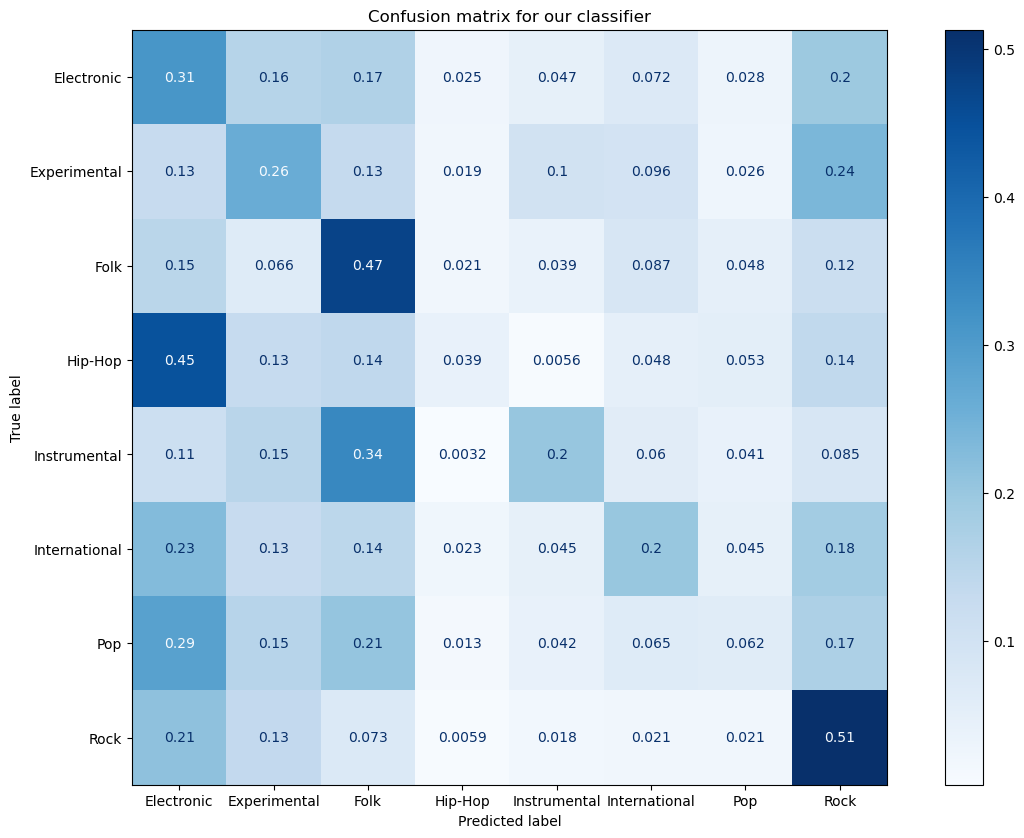

In [19]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100

# Predict the test set
predictions = clf.predict(X_test)
print(predictions)
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)

print(classification_report(y_test, predictions))

print("Accuracy: ", accuracy_score(y_test, predictions))